<a href="https://colab.research.google.com/github/DougAugSilva/IC_estatistica_modelos_de_regressao/blob/main/Delineamento_Inteiramente_Causalisado_(DIC)_no_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Delineamento Inteiramente Causalisado (DIC) no R

------------------------------------------------------------------------

## Teoria

### O que é o delineamneto inteiramente causalisado

O delineamento inteiramente casualizado é o mais simples dos delineamentos experimentais utilizados pelos estatísticos. Sua principal característica é que as unidades experimentais (parceleas, indivíduos e etc) são designados aos tratamentos de forma completamente aleatória, como se fosse um sorteio.

### Principais caracteristicas

-   Por levar em consideração apenas os princípios da repetição e da casualização, são considerados os mais simples delineamentos experimentais.

-   São instalados em situações de **homogeneidade**, por isso são muito usados em ambientes controlados, tais como casas de vegetação, laboratórios e etc.

    
| Tratamentos | Observações                  | Totais   | Médias              |
|------------ |------------------------------|----------|---------------------|
| 1           | $y_{11}, y_{12}, ..., y_{1b}$ | $y_{1*}$ | $\overline{y_{1*}}$ |
| 2           | $y_{21}, y_{22}, ..., y_{2b}$ | $y_{2*}$ | $\overline{y_{2*}}$ |
| ...         | ...                          | ...      | ...                 |
| a           | $y_{a1}, y_{a2}, ..., y_{ab}$ | $y_{a*}$ | $\overline{y_{a*}}$ |

  O modelo estatístico para o delineamento inteiramente causalizado é:\
  $y_{ij} = \mu + \tau_i + \varepsilon_{ij} \text{ com } i = 1, .. ,a \text{ e } j = 1, ..., b$

  Sendo que:

  -   $y_{ij}$ : é a observação da j-ésima repetição do i-ésimo tratamento.

  -   $\mu$ : é a média geral.

  -   $\tau_i$ : é o efeito do i-ésimo tratamento quando esta se desvia da media geral.

  -   $\varepsilon_{ij}$ : é o erro experimental aleatório j-ésima repetição do i-ésimo tratamento.

### Vantagens

-   Pode-se utilizar qualquer número de tratamentos e repetições, sendo que o número de repetições pode variar de um tratamento para outro (ensaio desbalanceado) sem dificultar as análises.

-   O número de repetições depende apenas do número de unidades experimentais disponíveis.

-   Apresenta maior número de graus de liberdade associado ao erro em relação a outros delineamentos.

### Desvantagens

-   Exige homogeneidade das condições experimentais (variação apenas do fator a ser comparado).

-   Pode-se obter uma estimativa da **variância do erro experimental** bem alta, quando não utilizado corretamente, pois uma vez que não se considera o princípio do controle local, todas as variações, exceto **as devidas aos tratamentos**, são consideradas como variações ao acaso.

### Comparando mais de duas médias

Sabemos que para comparar se duas médias são estatisticamente iguais podemos realizar o teste t-student, porém para ao caso de duas ou mais médias, não podemos apenas aplicar o teste t em duas médias duas a duas distintas, além de ser computacionalmente eficiente, dado que a medida que adicionássemos mais tratamentos a ordem de comparações iria crescer de forma fatorial, fazer isso também seria estatisticamente errado.

O procedimento correto neste caso de comparação de duas ou médias é aplicar a técnica da Análise de Variância (ANOVA). Este teste compara todas as médias dos tratamentos em um único teste e visa identificar a existência de ao menos uma diferença entre os tratamentos, mantendo o nível de significância $\alpha$ do teste, diferente do caso em que aplicamos dois dois testes t.

### Teoria da Análise de Variância ANOVA

Quando se instala um experimento no delineamento inteiramente casualizado, o objetivo é, em geral, verificar se existe diferença significativa entre pelo menos duas médias de tratamento. Com isso as hipóteses são:

-   **H0**: $\mu_1 = \mu_2 = ... = \mu_a$

-   **H1**: $\mu_i \neq \mu_j$ para pelo menos duas médias de tartamentos diferentes entre si.

O método ANOVA só é valido para testar essas hipóteses, se forem satisfeitas as seguintes condições:

-   **aditividade**: Os efeitos devem se somar (não há interação).

-   **independência**: Os erros $\varepsilon_{ij}$ devem ser independentes.

-   **normalidade**: Os erros $\varepsilon_{ij}$ devem possuir uma distribuição normal.

-   **homocedasticidade ou homogeneidade de variâncias**: Os erros $\varepsilon_{ij}$ devem possuir uma variância comum $\sigma^2$ .

Para a verificação da normalidade dos erros, em geral, utilizam-se os testes de normalidade, tais como Lillieforts e Shapiro Wilk. Já para a homogeneidade das variâncias pode ser verificada por meio do teste de Bartlett, teste do F máximo e teste de Levene.

Para verificarmos se a hipótese nula **H0** é aceita ou não, completa-se o seguinte *Quadro de Análise de Variância*:

| Causas da Variação | Graus de Liberdade | Soma dos Quadrados (SQ) | Soma dos Quadrados Méwdios (QM) | F Calculado | F tabelado |
|----|----|----|----|----|----|
| Tratamentos | a - 1 | SQTrat | SQTrat/(a -1) | QMTrat/QMRes | Retirado da distribuição F |
| Resíduos | a(b-1) | SQRes | SQRes/[a(b-1)] |  |  |

------------------------------------------------------------------------

## Exemplo de Aplicação : Caso Resistencia do Concreto

Seja yij o valor da resitência do coincreto à compressão (psi) do j-ésimo corpo de prova que recebeu a i-ésima técnica de mistura (tratamento). Os valores das resitências podem ser na forma da Tablea:

|              | Técnica A | Técnica B | Técnica C | Técnica D |           |
|--------------|-----------|-----------|-----------|-----------|-----------|
|              | 3129      | 3200      | 2800      | 2600      |           |
|              | 3000      | 3300      | 2900      | 2700      |           |
|              | 2865      | 2975      | 2985      | 2600      |           |
|              | 2890      | 3150      | 3050      | 2765      | **Total** |
| yi           | 11884     | 12625     | 11735     | 10665     | 46909     |
| soma(yij)\^2 | 35350966  | 39903125  | 34462725  | 28445225  | 138172041 |

: dados coletados

Ao nível de 5% de significância, conclua se asa técnicas de mistura afetam a resistência do concreto.

In [1]:
# Primeiro vamos instalar e carregar alguns pacotes

install.packages('ggplot2')
install.packages('dae')
install.packages('MASS')
install.packages('hnp')

library(ggplot2)
library(dae)
library(MASS)
library(hnp)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘ggpubr’, ‘plyr’, ‘tryCatchLog’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Depois de instalos os pacortes, vamos gerar uma sequencia de numeros de 1 a 16, para podermos associar os tratamentos aos respectivos dados coletados.


In [2]:
plots <- 1:16 #Gera numneros de 1 a 16

trat <- factor(rep(c("A","B","C","D"), times=(c(4,4,4,4))))  #Cria os tratamentos e repete os fatores A, B, C, D 4 vezes cada

resist <- c(3119, 3000, 2865, 2890, 3200, 3300, 2975, 3150, 2800, 2900, 2985, 3050, 2600, 2700, 2600, 2765)

resist.dat <- data.frame(plots, resist, trat)

resist.dat

plots,resist,trat
<int>,<dbl>,<fct>
1,3119,A
2,3000,A
3,2865,A
4,2890,A
5,3200,B
6,3300,B
7,2975,B
8,3150,B
9,2800,C


## Análise exploratória dos dados

Agora na análise exploratória vamos calcular os seguintes fatores:

-   A média dos tratamentos

-   A variância de cada tratamento

-   O desvio padrão de cada tratamento

In [3]:
(media_tratamento = tapply(resist, trat, mean)) #media
(varia_tratamento = tapply(resist, trat, var)) #variancia
(descio_tratamento = tapply(resist, trat, sd)) #desvio padrao

A       B       C       D 
2968.50 3156.25 2933.75 2666.25

A        B        C        D 
13505.67 18489.58 11722.92  6556.25

A         B         C         D 
116.21388 135.97641 108.27242  80.97067

### Boxplots dos dados

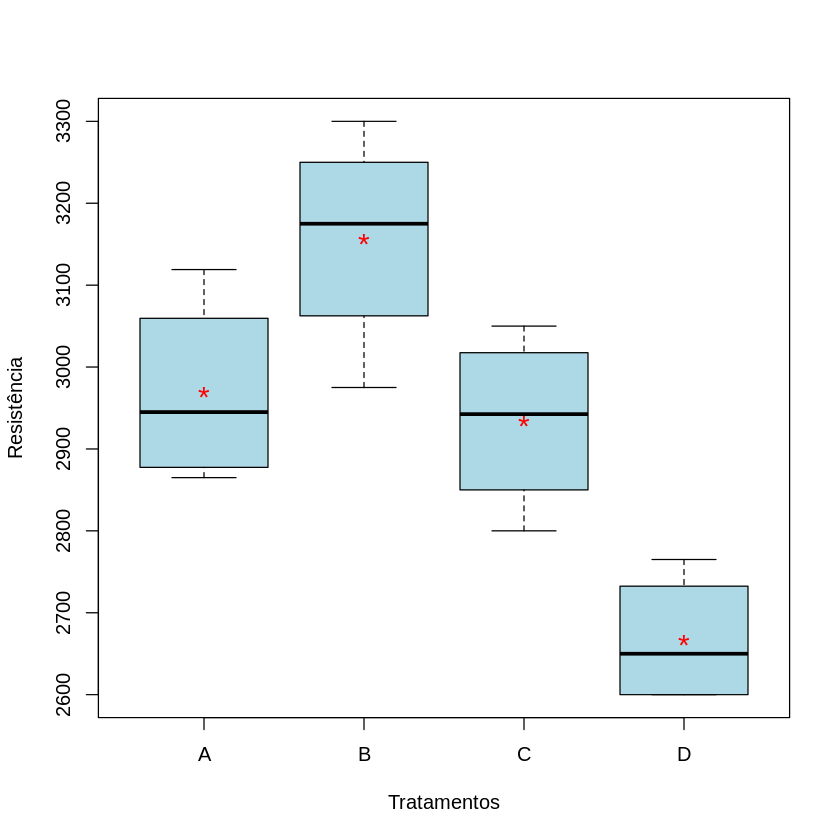

In [4]:
boxplot(split(resist, trat), xlab = "Tratamentos", ylab = "Resistência", col = "lightblue")
points(media_tratamento, col = "red", pch = "*", cex = 1.5)

### Teste da homogenidade das vcariâncias

Podemos agora realizar um teste Bartlett de homogeneidade das variâncias, por meio da formulção das seguintes hipoteses:

-   **H0**: As variâncias são homogeneas

-   **H1**: As variâncias não são homogeneas

In [5]:
bartlett.test(resist ~ trat)


	Bartlett test of homogeneity of variances

data:  resist by trat
Bartlett's K-squared = 0.69153, df = 3, p-value = 0.8752


O que nos interessa nesse teste é o p-valor, que neste caso é de 0,81, dado que definimos um nivel se significancia de 5% = 0,05, dado qualquer p-valor maior que 0,05 podemos *rejeitar H0*, logo as variâncias *são homogeneas*.

### Modelo estatístico ANOVA

Dado que as as variâncias são homogeneas, podemos realizar o teste ANOVA. O primeiro passo é a criação do modelo estatistico para a execução do teste:

In [6]:
mod <- aov(resist ~ trat, data = resist.dat)  #modelo para o ANOVA
anova(mod)  #retorna a tabela da ANOVA

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
trat,3,488975.2,162991.7,12.96816,0.0004494905
Residuals,12,150823.2,12568.6,NA,NA


Lembrando que estamops verificando o seguinte teste de hipótese:

-   **H0**: media do A = media do B = ... = media do D.

-   **H1**: media do [ i ] != media [ j ], para pelo menos dois i != j, com i,j = A, ... , D.

Dado este resultado da análise de variância, onde o p-valor é muito menor que 5% = 0,05 (0,05 \>\> 0,00044), podemos rejeitar H0 ao nivel se significancia de 5%, e com isso existe pelo menos duas médias de tratamento que diferem entre si.

### Verificando a Independência do Erros

Para o modelo fazer sentido, é necessário que os residuos sigam uma distribuição normal. Primeiro vemos os valores dos residuos.

In [7]:
res = residuals(mod)
res

1       2       3       4       5       6       7       8       9      10 
 150.50   31.50 -103.50  -78.50   43.75  143.75 -181.25   -6.25 -133.75  -33.75 
     11      12      13      14      15      16 
  51.25  116.25  -66.25   33.75  -66.25   98.75

Depois plotamos estes valores no seguinte gráfico para averiguamos a independencia dos residuos.

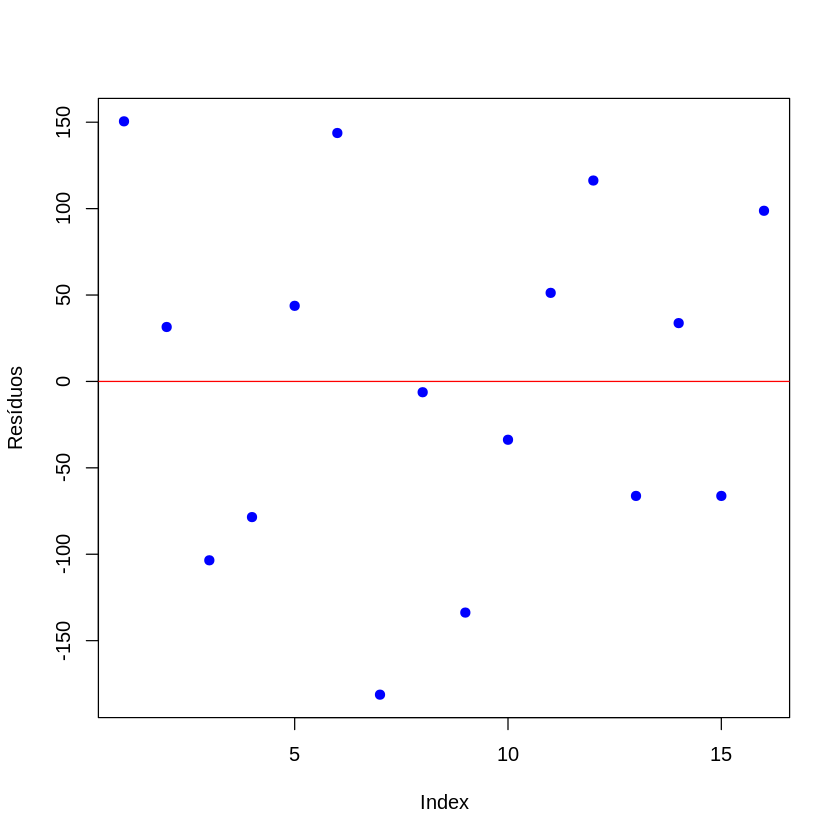

In [8]:
plot(res, pch = 19, ylab = "Resíduos", col = "blue")
abline(h = 0, col = "red")

### Teste de Normalidade dos Resíduos

Para isso faremos o seguinte teste de hipótese, utilizando o teste de normalidade de Shapiro Wilk.

-   **H0**: Os resíduos são normais

-   **H1**: Os resíduos não são normais

In [9]:
shapiro.test(res)


	Shapiro-Wilk normality test

data:  res
W = 0.96558, p-value = 0.7629


Dado um nível de significancia de 5% = 0,05, como temos o p-valor igual a 0,76 \>\> 0,05, não rejeitamos H0, e com isso concluimos que os residuos seguem uma distribuição normal.

### Gráfico do envelope simulado

Tentamos simular os residos por meio de uma distribuição normal, para assim verificarmos a adequabilidade do modelo que estamos trabalhando. As vezes o modelo pode não ser adequado para o tipo de delineamento que estamos utilizando.

Gaussian model (aov object) 


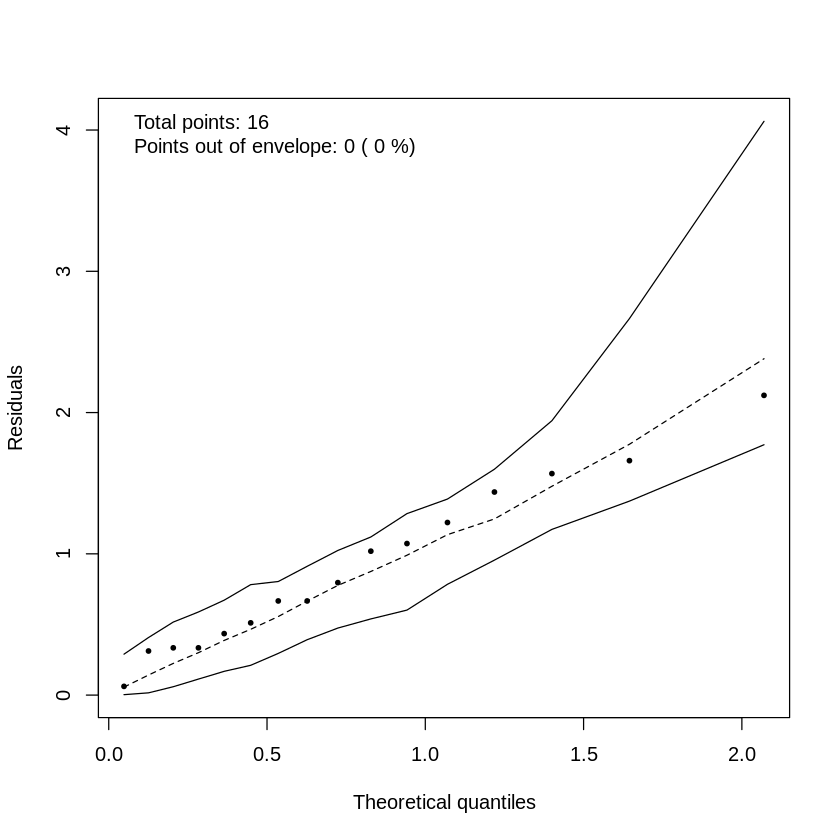

In [10]:
hnp(mod, print.on = T, pch = 19)

dado que não temos nenhum ponto fora do envelope simulado, o modelo é adequado para o tipo de delineamento.

### Teste de Comparações Múltiplas : Teste de Tukey

A partir do momento que pelo resultado do teste da ANOVA, temos que pelo menos duas médias diferementre si, caso queiramos saber também quais destas diferem, podemos realizar o *teste de comparações multiplas de Tukey.*

-   O teste de Tukey serve para testar qualquer diferença entre duas médias.

-   O teste é exato qyando duas médias de tratamento têm o mesmo número de repetiçoes.

-   Por ser um teste rigoroso, geralmente, o teste de Tukey é aplicado apenas no nível de 5% de significância.

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = resist ~ trat, data = resist.dat)

$trat
       diff        lwr        upr     p adj
B-A  187.75  -47.60545  423.10545 0.1367814
C-A  -34.75 -270.10545  200.60545 0.9706206
D-A -302.25 -537.60545  -66.89455 0.0114477
C-B -222.50 -457.85545   12.85545 0.0660454
D-B -490.00 -725.35545 -254.64455 0.0002389
D-C -267.50 -502.85545  -32.14455 0.0246704



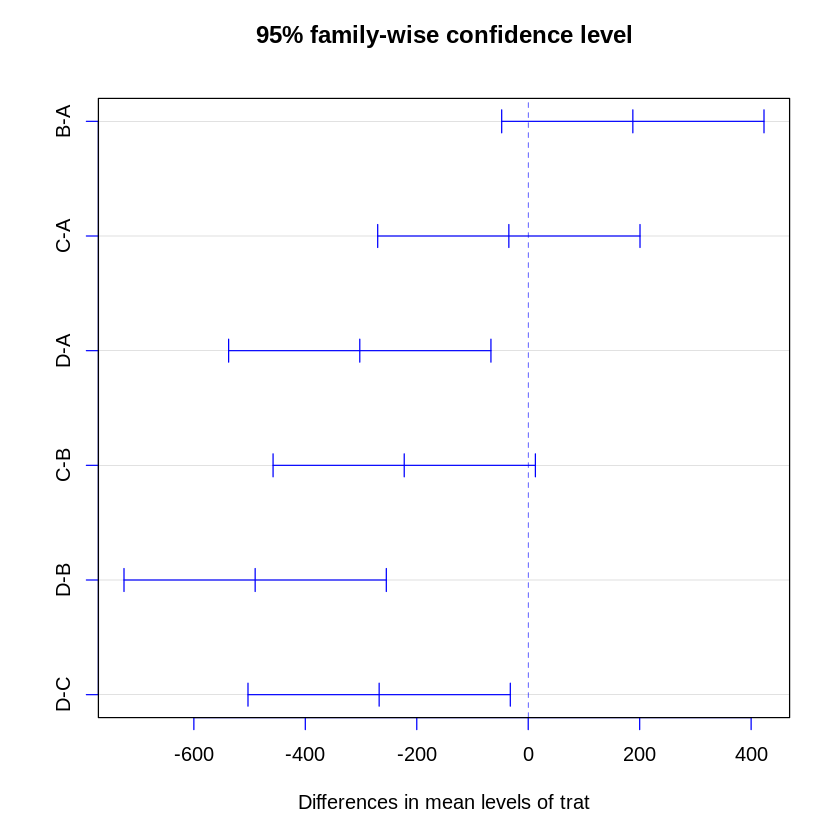

In [11]:
teste_tukey <- TukeyHSD(mod)
print(teste_tukey)
plot(teste_tukey, col = 'blue')

O gráfico acima mostra uma comparação entre os intervalos de confiança para as médias, geradas pelo teste de Tukey, note que quando o zero (linha tracejada vertical) pertence ao intervalo, temos que as médias são **estatisticamente iguais**, isso ocorre para as médias **B com A**, **C e A**, e **C com B**.